## Importing reqd. liberaries

In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

from scipy.stats import randint

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data=pd.read_excel('/kaggle/input/newdataset/RFLFSODataFull.xlsx')

## Feature Selection

In [ ]:
data=pd.read_excel('/content/RFLFSODataFull.xlsx')

columns = data.columns

rf_col = 'RF_Att'
fso_col = 'FSO_Att'

def feature_selection(data, target_col, drop_col):

    if drop_col in data.columns:

        data = data.drop(columns=[drop_col])

    else:

        print(f"Column '{drop_col}' not found in dataset. Skipping drop step.")

    y = data[target_col]

    X = data.drop(columns=[target_col])
    results = []

    remaining_features = list(X.columns)

    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    while len(remaining_features) > 1:

        model.fit(X[remaining_features], y)

        y_pred = model.predict(X[remaining_features])

        rmse = mean_squared_error(y, y_pred, squared=False)

        r2 = r2_score(y, y_pred)

        results.append({

            'Remaining_Features': remaining_features.copy(),

            'RMSE': rmse,

            'R2': r2

        })

        print(f"Remaining features: {remaining_features}, RMSE: {rmse}, R2: {r2}")


        feature_importances = model.feature_importances_

        least_important_feature = remaining_features[np.argmin(feature_importances)]

        print(f"Removing least important feature: {least_important_feature}")

        remaining_features.remove(least_important_feature)

    return pd.DataFrame(results)


fso_col = 'FSO_Att'

rf_col = 'RFL_Att'

print("Feature Selection for FSO Attenuation:")

results_fso = feature_selection(data, target_col=fso_col, drop_col=rf_col)

print("\nFeature Selection for RF Attenuation:")

results_rf = feature_selection(data, target_col=rf_col, drop_col=fso_col)

results_fso.to_csv('/Users/simranjeetkaur/Downloads/Data Sci- Project/results_fso.csv', index=False)

results_rf.to_csv('//Users/simranjeetkaur/Downloads/Data Sci- Project/results_rf.csv', index=False)


Feature Selection for FSO Attenuation:


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'], RMSE: 0.28174766988353817, R2: 0.9947911647102178
Removing least important feature: Frequency


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'], RMSE: 0.2817340680728887, R2: 0.994791667627464
Removing least important feature: RainIntensityMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'], RMSE: 0.2818213273740711, R2: 0.9947884408553037
Removing least important feature: RainIntensityMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'], RMSE: 0.28122059699030727, R2: 0.9948106350959538
Removing least important feature: SYNOPCode


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'], RMSE: 0.281562768785196, R2: 0.9947979992181011
Removing least important feature: WindDirection


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'], RMSE: 0.27765000769883647, R2: 0.9949415747303988
Removing least important feature: RainIntensity


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'], RMSE: 0.2775889546023724, R2: 0.9949437991032598
Removing least important feature: WindSpeedMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax'], RMSE: 0.2772836499400466, R2: 0.9949549150556563
Removing least important feature: AbsoluteHumidityMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax'], RMSE: 0.27456351151274655, R2: 0.9950534135920762
Removing least important feature: AbsoluteHumidityMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax'], RMSE: 0.27136247728573426, R2: 0.9951680820694817
Removing least important feature: WindSpeed


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeedMax'], RMSE: 0.27526043857331767, R2: 0.995028269790541
Removing least important feature: WindSpeedMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin'], RMSE: 0.2814941659390621, R2: 0.9948005338471274
Removing least important feature: TemperatureMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin'], RMSE: 0.278577992176965, R2: 0.9949077048613377
Removing least important feature: VisibilityMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMin'], RMSE: 0.2769010849818619, R2: 0.9949688267396809
Removing least important feature: TemperatureDifference


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMin'], RMSE: 0.30561656177215574, R2: 0.9938712242670706
Removing least important feature: ParticulateMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMin'], RMSE: 0.3052957732011991, R2: 0.9938840835792497
Removing least important feature: RelativeHumidity


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMin', 'Temperature', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMin'], RMSE: 0.3045514535412417, R2: 0.9939138687779844
Removing least important feature: Time


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMin', 'Temperature', 'TemperatureMin', 'Visibility', 'VisibilityMin'], RMSE: 0.3962841965475539, R2: 0.9896953447794009
Removing least important feature: TemperatureMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMin', 'Temperature', 'Visibility', 'VisibilityMin'], RMSE: 0.39310873740193747, R2: 0.9898598272887119
Removing least important feature: Particulate


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'ParticulateMin', 'Temperature', 'Visibility', 'VisibilityMin'], RMSE: 0.39362207694004075, R2: 0.9898333269859991
Removing least important feature: AbsoluteHumidity


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['Distance', 'ParticulateMin', 'Temperature', 'Visibility', 'VisibilityMin'], RMSE: 0.48754217331058786, R2: 0.984402882764363
Removing least important feature: VisibilityMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['Distance', 'ParticulateMin', 'Temperature', 'Visibility'], RMSE: 0.48514514483206966, R2: 0.9845558739485065
Removing least important feature: ParticulateMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['Distance', 'Temperature', 'Visibility'], RMSE: 0.6702377833933393, R2: 0.9705233739347787
Removing least important feature: Temperature


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['Distance', 'Visibility'], RMSE: 0.9702110034427635, R2: 0.9382335913819592
Removing least important feature: Visibility

Feature Selection for RF Attenuation:


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'], RMSE: 0.1796682617164805, R2: 0.9972702976850158
Removing least important feature: WindDirection


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'], RMSE: 0.1791657392169982, R2: 0.9972855459929795
Removing least important feature: WindSpeedMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax'], RMSE: 0.17921588901723592, R2: 0.9972840261892648
Removing least important feature: WindSpeed


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeedMax'], RMSE: 0.17891107503900233, R2: 0.9972932570979789
Removing least important feature: Particulate


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeedMax'], RMSE: 0.17880587791172048, R2: 0.9972964392136255
Removing least important feature: WindSpeedMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin'], RMSE: 0.17793340916912903, R2: 0.9973227584553475
Removing least important feature: AbsoluteHumidityMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin'], RMSE: 0.17592923321214635, R2: 0.9973827297079588
Removing least important feature: TemperatureMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin'], RMSE: 0.17466547484527561, R2: 0.9974201961071768
Removing least important feature: VisibilityMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'Time', 'Visibility', 'VisibilityMax'], RMSE: 0.17327854271435209, R2: 0.9974610033393826
Removing least important feature: AbsoluteHumidityMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Frequency', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'Time', 'Visibility', 'VisibilityMax'], RMSE: 0.17031739747270555, R2: 0.9975470393549308
Removing least important feature: ParticulateMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Frequency', 'ParticulateMax', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'Time', 'Visibility', 'VisibilityMax'], RMSE: 0.16971351058679382, R2: 0.997564403225892
Removing least important feature: TemperatureDifference


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Frequency', 'ParticulateMax', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureMax', 'Time', 'Visibility', 'VisibilityMax'], RMSE: 0.17955403745836038, R2: 0.9972737674031046
Removing least important feature: VisibilityMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Frequency', 'ParticulateMax', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureMax', 'Time', 'Visibility'], RMSE: 0.17865484748710497, R2: 0.9973010044716837
Removing least important feature: Time


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'Frequency', 'ParticulateMax', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureMax', 'Visibility'], RMSE: 0.20685329424031093, R2: 0.9963817594270606
Removing least important feature: Frequency


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'ParticulateMax', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureMax', 'Visibility'], RMSE: 0.2667737377689169, R2: 0.9939819096514029
Removing least important feature: TemperatureMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'ParticulateMax', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'Visibility'], RMSE: 0.26583839603353054, R2: 0.9940240360104876
Removing least important feature: ParticulateMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'Visibility'], RMSE: 0.26683725893775545, R2: 0.9939790433899187
Removing least important feature: RelativeHumidity


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'SYNOPCode', 'Temperature', 'Visibility'], RMSE: 0.27118864000338566, R2: 0.9937810718070743
Removing least important feature: SYNOPCode


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'Temperature', 'Visibility'], RMSE: 0.2711799678728311, R2: 0.9937814695412484
Removing least important feature: Visibility


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'Temperature'], RMSE: 0.317493509030404, R2: 0.9914760232272276
Removing least important feature: RainIntensityMin


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'Temperature'], RMSE: 0.3162035862000167, R2: 0.9915451454987708
Removing least important feature: Temperature


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax'], RMSE: 0.39296245474643476, R2: 0.9869420598980143
Removing least important feature: RainIntensityMax


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Remaining features: ['AbsoluteHumidity', 'Distance', 'RainIntensity'], RMSE: 0.39239522095340607, R2: 0.9869797304639473
Removing least important feature: Distance
Remaining features: ['AbsoluteHumidity', 'RainIntensity'], RMSE: 0.8159450345752237, R2: 0.9437018189038031
Removing least important feature: RainIntensity


/Users/simranjeetkaur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Plotting for FSO Attenuation:


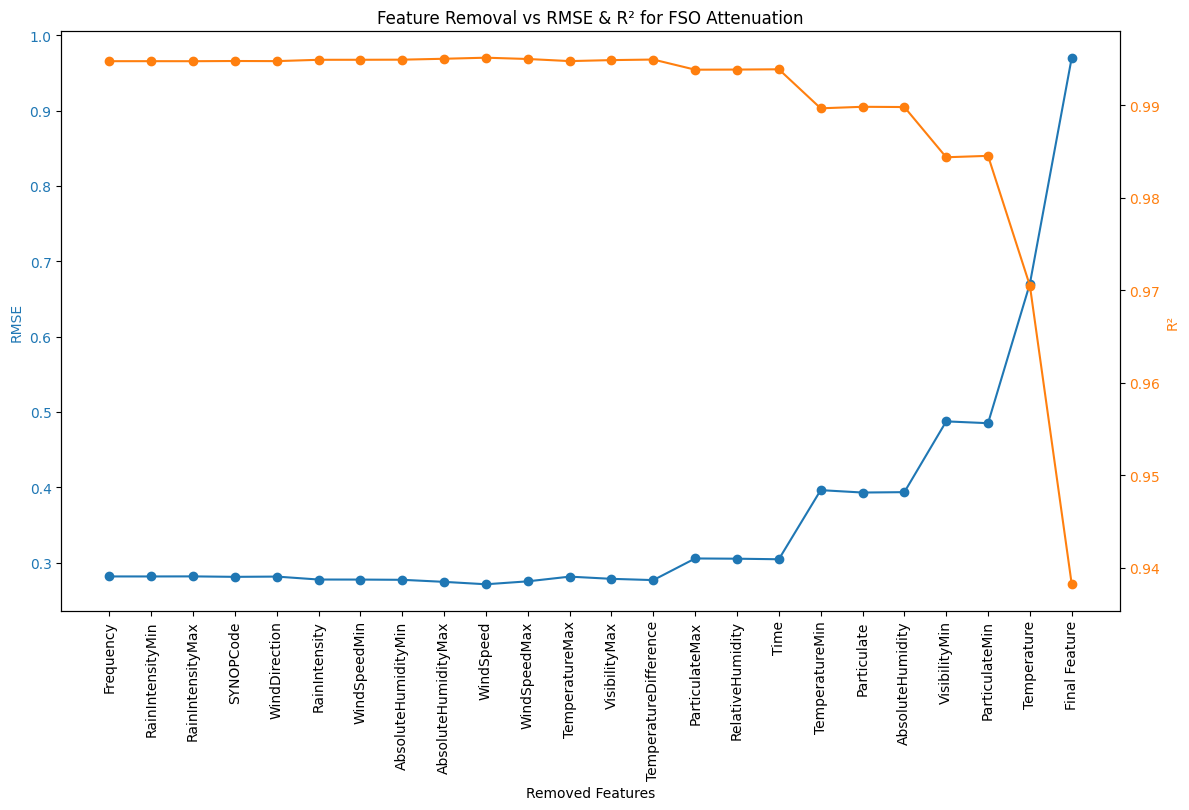

Plotting for RF Attenuation:


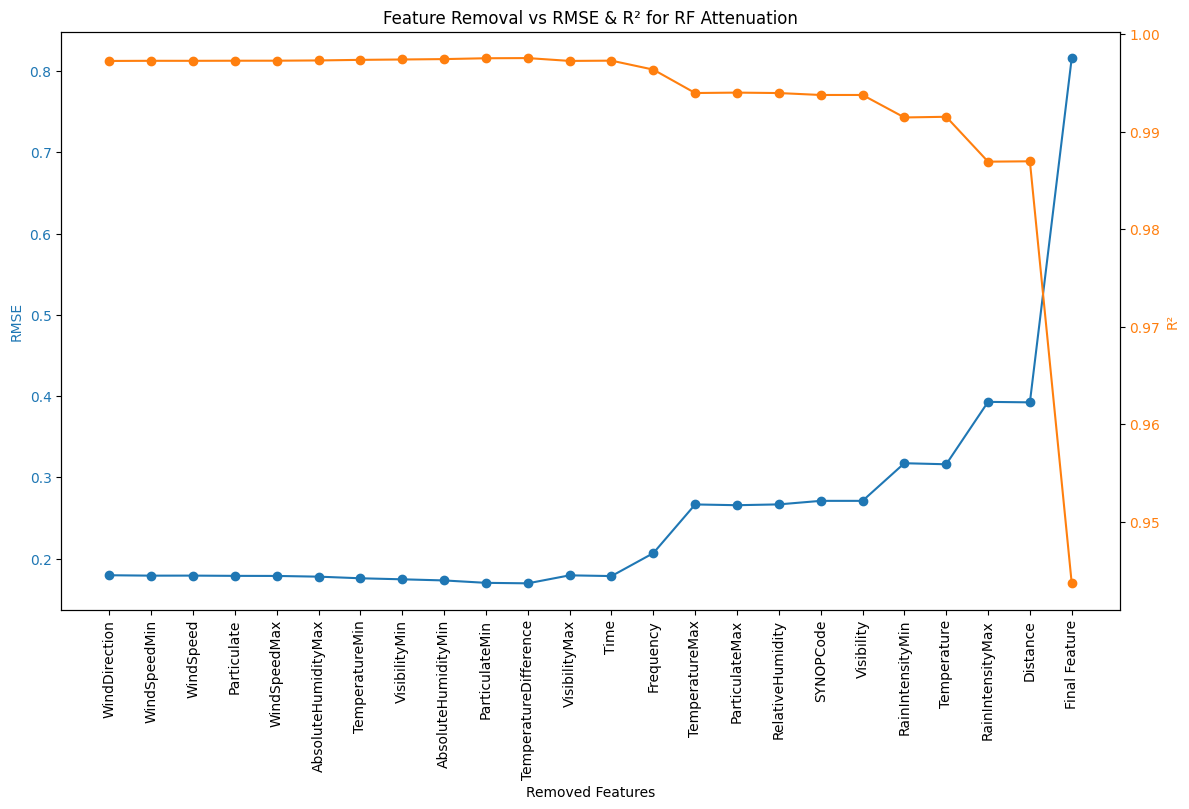

In [ ]:
def removed_features_plot(results, target_name):

    removed_features = [set(results.iloc[i]['Remaining_Features']) - set(results.iloc[i+1]['Remaining_Features'])

                        for i in range(len(results) - 1)]

    removed_features = [list(f)[0] if f else 'Final Feature' for f in removed_features] + ['Final Feature']



    rmse_values = results['RMSE']

    r2_values = results['R2']


    fig, ax1 = plt.subplots(figsize=(12, 8))

    ax1.set_xlabel('Removed Features')

    ax1.set_ylabel('RMSE', color='tab:blue')

    ax1.plot(removed_features, rmse_values, color='tab:blue', marker='o', label='RMSE')

    ax1.tick_params(axis='y', labelcolor='tab:blue')



    ax2 = ax1.twinx()

    ax2.set_ylabel('R²', color='tab:orange')

    ax2.plot(removed_features, r2_values, color='tab:orange', marker='o', label='R²')

    ax2.tick_params(axis='y', labelcolor='tab:orange')


    ax1.set_xticks(range(len(removed_features)))

    ax1.set_xticklabels(removed_features, rotation=90)

    fig.tight_layout()

    plt.title(f'Feature Removal vs RMSE & R² for {target_name}')

    plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.show()

print("Plotting for FSO Attenuation:")

plot_rmse_r2_vs_removed_features(results_fso, target_name='FSO Attenuation')


print("Plotting for RF Attenuation:")

removed_features_plot(results_rf, target_name='RF Attenuation')


## Retaining important features for FSO and RFL

In [ ]:
data_FSO = data [['SYNOPCode','TemperatureMin', 'Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature','FSO_Att']]
data_RFL = data [['SYNOPCode','RainIntensityMin','RainIntensityMax','Distance','Temperature','RFL_Att']]

In [ ]:
data_FSO = data_FSO.copy()

synop_values = [0, 3, 4, 5, 6, 7, 8]

categories = ['clear', 'dust_storm', 'fog', 'drizzle', 'rain', 'snow', 'showers']

data_FSO['SYNOPCode_Categorical'] = pd.Categorical(

    data_FSO['SYNOPCode'],

    categories=synop_values,

    ordered=True

)

data_FSO['SYNOPCode_Categorical'] = data_FSO['SYNOPCode_Categorical'].map(

    dict(zip(synop_values, categories))

)
print(data_FSO[['SYNOPCode', 'SYNOPCode_Categorical']].head())

   SYNOPCode SYNOPCode_Categorical
0          0                 clear
1          0                 clear
2          0                 clear
3          0                 clear
4          0                 clear


In [ ]:
X = data_FSO[['SYNOPCode_Categorical','TemperatureMin', 'Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature']]
y = data_FSO[['FSO_Att']]

##One hot encoding as a part of pre-processing

In [ ]:
encoder = OneHotEncoder(sparse=False, drop='first')

encoded_features = encoder.fit_transform(X[['SYNOPCode_Categorical']])

encoded_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(['SYNOPCode_Categorical']),
    index=X.index
)

X = X.drop('SYNOPCode_Categorical', axis=1)
X = pd.concat([X, encoded_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (63965, 12), (63965, 1)
Test set: (27414, 12), (27414, 1)


## Hyperparameter tunning for FSO
  ### Method 1 (Generic Method)
  #### Random Search

In [ ]:
param_dist = {
    'n_estimators': randint(100, 250),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}
rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50,
                                   cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train.values.ravel())

print(f"Best parameters from RandomizedSearchCV: {random_search.best_params_}")

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters from RandomizedSearchCV: {'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 223}


#### Grid search

In [ ]:
param_grid = {

    'n_estimators': [random_search.best_params_['n_estimators'] - 50, random_search.best_params_['n_estimators'], random_search.best_params_['n_estimators'] + 50],
    'max_features': [random_search.best_params_['max_features']],
    'max_depth': [random_search.best_params_['max_depth'] - 5, random_search.best_params_['max_depth'], random_search.best_params_['max_depth'] + 5],
    'min_samples_split': [random_search.best_params_['min_samples_split']],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf']]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

Best parameters from GridSearchCV: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 273}


#### Hybrid search

In [ ]:
best_params = grid_search.best_params_

best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_test_pred = best_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

/tmp/ipykernel_30/1563637469.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train, y_train)


Root Mean Squared Error (RMSE): 1.6133
R² Score: 0.8261



  ### Method 1 (Generic Method) for RFL


In [ ]:
data_RFL = data_RFL.copy()

synop_values = [0, 3, 4, 5, 6, 7, 8]

categories = ['clear', 'dust_storm', 'fog', 'drizzle', 'rain', 'snow', 'showers']

data_RFL['SYNOPCode_Categorical'] = pd.Categorical(

    data_RFL['SYNOPCode'],

    categories=synop_values,

    ordered=True
)

data_RFL['SYNOPCode_Categorical'] = data_RFL['SYNOPCode_Categorical'].map(

    dict(zip(synop_values, categories))

)

print(data_RFL[['SYNOPCode', 'SYNOPCode_Categorical']].head())

   SYNOPCode SYNOPCode_Categorical
0          0                 clear
1          0                 clear
2          0                 clear
3          0                 clear
4          0                 clear


In [ ]:
X = data_RFL [['SYNOPCode_Categorical','RainIntensityMin','RainIntensityMax','Distance','Temperature']]
y = data_RFL['RFL_Att']

In [ ]:
encoder = OneHotEncoder(sparse=False, drop='first')

encoded_features = encoder.fit_transform(X[['SYNOPCode_Categorical']])

encoded_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(['SYNOPCode_Categorical']),
    index=X.index
)

X = X.drop('SYNOPCode_Categorical', axis=1)
X = pd.concat([X, encoded_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (63965, 10), (63965,)
Test set: (27414, 10), (27414,)


In [ ]:
X_train.head()

,RainIntensityMin,RainIntensityMax,Distance,Temperature,SYNOPCode_Categorical_drizzle,SYNOPCode_Categorical_dust_storm,SYNOPCode_Categorical_fog,SYNOPCode_Categorical_rain,SYNOPCode_Categorical_showers,SYNOPCode_Categorical_snow
12119,0.0,0.0,2963.960736,16.763823,0.0,0.0,0.0,0.0,0.0,0.0
12395,0.0,0.0,2964.964776,22.123704,0.0,0.0,0.0,0.0,0.0,0.0
45768,0.0,0.0,2014.818821,16.663018,0.0,0.0,0.0,0.0,0.0,0.0
43767,0.0,0.0,2013.471197,5.469308,0.0,0.0,0.0,0.0,0.0,0.0
79697,0.0,0.0,4825.649500,1.180987,0.0,0.0,0.0,0.0,0.0,0.0


##Hyperparameter tunning for RFL
### Random search

In [ ]:
param_dist = {

    'n_estimators': randint(100, 250),

    'max_features': ['sqrt', 'log2'],

    'max_depth': randint(10, 30),

    'min_samples_split': randint(2, 10),

    'min_samples_leaf': randint(1, 10)

}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50,

                                   cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print(f"Best parameters from RandomizedSearchCV: {random_search.best_params_}")

Best parameters from RandomizedSearchCV: {'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 220}


### Grid search

In [ ]:
param_grid = {

    'n_estimators': [random_search.best_params_['n_estimators'] - 50, random_search.best_params_['n_estimators'], random_search.best_params_['n_estimators'] + 50],
    'max_features': [random_search.best_params_['max_features']],
    'max_depth': [random_search.best_params_['max_depth'] - 5, random_search.best_params_['max_depth'], random_search.best_params_['max_depth'] + 5],
    'min_samples_split': [random_search.best_params_['min_samples_split']],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf']]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

Best parameters from GridSearchCV: {'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 270}


###Hybrid search

In [ ]:
best_params = grid_search.best_params_

best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_test_pred = best_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 1.7552
R² Score: 0.7541


# Method 2(Special Method)
## grouping the data based on synopcode

In [ ]:
synop_groups = data_FSO.groupby('SYNOPCode')

for synop_code, group in synop_groups:

    filename = f"FSO_dataset_SYNOPCode_{synop_code}.csv"
    group.to_csv(filename, index=False)

    print(f"Dataset for SYNOPCode {synop_code} saved as {filename}.")

Dataset for SYNOPCode 0 saved as FSO_dataset_SYNOPCode_0.csv.
Dataset for SYNOPCode 3 saved as FSO_dataset_SYNOPCode_3.csv.
Dataset for SYNOPCode 4 saved as FSO_dataset_SYNOPCode_4.csv.
Dataset for SYNOPCode 5 saved as FSO_dataset_SYNOPCode_5.csv.
Dataset for SYNOPCode 6 saved as FSO_dataset_SYNOPCode_6.csv.
Dataset for SYNOPCode 7 saved as FSO_dataset_SYNOPCode_7.csv.
Dataset for SYNOPCode 8 saved as FSO_dataset_SYNOPCode_8.csv.


In [ ]:
df_0= pd.read_csv('/kaggle/working/FSO_dataset_SYNOPCode_0.csv')
df_3= pd.read_csv('/kaggle/working/FSO_dataset_SYNOPCode_3.csv')
df_4= pd.read_csv('/kaggle/working/FSO_dataset_SYNOPCode_4.csv')
df_5= pd.read_csv('/kaggle/working/FSO_dataset_SYNOPCode_5.csv')
df_6= pd.read_csv('/kaggle/working/FSO_dataset_SYNOPCode_6.csv')
df_7= pd.read_csv('/kaggle/working/FSO_dataset_SYNOPCode_7.csv')
df_8= pd.read_csv('/kaggle/working/FSO_dataset_SYNOPCode_8.csv')

In [ ]:
synop_groups = data_RFL.groupby('SYNOPCode')

for synop_code, group in synop_groups:

    filename = f"RFL_dataset_SYNOPCode_{synop_code}.csv"
    group.to_csv(filename, index=False)

    print(f"Dataset for SYNOPCode {synop_code} saved as {filename}.")

Dataset for SYNOPCode 0 saved as RFL_dataset_SYNOPCode_0.csv.
Dataset for SYNOPCode 3 saved as RFL_dataset_SYNOPCode_3.csv.
Dataset for SYNOPCode 4 saved as RFL_dataset_SYNOPCode_4.csv.
Dataset for SYNOPCode 5 saved as RFL_dataset_SYNOPCode_5.csv.
Dataset for SYNOPCode 6 saved as RFL_dataset_SYNOPCode_6.csv.
Dataset for SYNOPCode 7 saved as RFL_dataset_SYNOPCode_7.csv.
Dataset for SYNOPCode 8 saved as RFL_dataset_SYNOPCode_8.csv.


In [ ]:
dfr_0= pd.read_csv('/kaggle/working/RFL_dataset_SYNOPCode_0.csv')
dfr_3= pd.read_csv('/kaggle/working/RFL_dataset_SYNOPCode_3.csv')
dfr_4= pd.read_csv('/kaggle/working/RFL_dataset_SYNOPCode_4.csv')
dfr_5= pd.read_csv('/kaggle/working/RFL_dataset_SYNOPCode_5.csv')
dfr_6= pd.read_csv('/kaggle/working/RFL_dataset_SYNOPCode_6.csv')
dfr_7= pd.read_csv('/kaggle/working/RFL_dataset_SYNOPCode_7.csv')
dfr_8= pd.read_csv('/kaggle/working/RFL_dataset_SYNOPCode_8.csv')

## Tranining model with SYNOP code = 0

### For FSO

In [ ]:
X = df_0[['TemperatureMin', 'Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature']]
y = df_0['FSO_Att']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (39874, 6), (39874,)
Test set: (17090, 6), (17090,)


In [ ]:
best_params = {
    'max_depth': 30,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 273
}

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 1.6809
R² Score: 0.7745


### For RFL

In [ ]:
X = dfr_0 [['RainIntensityMin','RainIntensityMax','Distance','Temperature']]
y = dfr_0['RFL_Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

best_params = {
    'max_depth': 16,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 270
}

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (39874, 4), (39874,)
Test set: (17090, 4), (17090,)
Root Mean Squared Error (RMSE): 0.8771
R² Score: 0.8834


# Tranining model with SYNOP code = 3
### For FSO

In [ ]:
X = df_3[['TemperatureMin', 'Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature']]
y = df_3['FSO_Att']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (133, 6), (133,)
Test set: (58, 6), (58,)


In [ ]:
best_params = {
    'max_depth': 30,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 273
}

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 1.4735
R² Score: 0.9732


### For RFL

In [ ]:
X = dfr_3 [['RainIntensityMin','RainIntensityMax','Distance','Temperature']]
y = dfr_3['RFL_Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

best_params = {
    'max_depth': 16,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 270
}

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (133, 4), (133,)
Test set: (58, 4), (58,)
Root Mean Squared Error (RMSE): 0.5550
R² Score: 0.9679


# Tranining model with SYNOP code = 4
### For FSO

In [ ]:
X = df_4[['TemperatureMin', 'Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature']]
y = df_4['FSO_Att']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (326, 6), (326,)
Test set: (140, 6), (140,)


In [ ]:
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 0.7472
R² Score: 0.9621


### For RFL

In [ ]:
X = dfr_4 [['RainIntensityMin','RainIntensityMax','Distance','Temperature']]
y = dfr_4['RFL_Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

best_params = {
    'max_depth': 16,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 270
}

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (326, 4), (326,)
Test set: (140, 4), (140,)
Root Mean Squared Error (RMSE): 0.8756
R² Score: 0.7578


# Tranining model with SYNOP code = 5
### For FSO

In [ ]:
X = df_5[['TemperatureMin', 'Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature']]
y = df_5['FSO_Att']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (4623, 6), (4623,)
Test set: (1982, 6), (1982,)
Root Mean Squared Error (RMSE): 1.2286
R² Score: 0.8848


### For RFL

In [ ]:
X = dfr_5 [['RainIntensityMin','RainIntensityMax','Distance','Temperature']]
y = dfr_5['RFL_Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

best_params = {
    'max_depth': 16,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 270
}

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (4623, 4), (4623,)
Test set: (1982, 4), (1982,)
Root Mean Squared Error (RMSE): 1.0750
R² Score: 0.8666



# Tranining model with SYNOP code = 6
### For FSO

In [ ]:
X = df_6[['TemperatureMin', 'Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature']]
y = df_6['FSO_Att']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (17512, 6), (17512,)
Test set: (7506, 6), (7506,)
Root Mean Squared Error (RMSE): 1.5664
R² Score: 0.8654


### For RFL

In [ ]:
X = dfr_6 [['RainIntensityMin','RainIntensityMax','Distance','Temperature']]
y = dfr_6['RFL_Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

best_params = {
    'max_depth': 16,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 270
}

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (17512, 4), (17512,)
Test set: (7506, 4), (7506,)
Root Mean Squared Error (RMSE): 1.4458
R² Score: 0.8676


# Tranining model with SYNOP code = 7
### For FSO

In [ ]:
X = df_7[['TemperatureMin', 'Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature']]
y = df_7['FSO_Att']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (293, 6), (293,)
Test set: (126, 6), (126,)
Root Mean Squared Error (RMSE): 1.0575
R² Score: 0.9600


### For RFL

In [ ]:
X = dfr_7 [['RainIntensityMin','RainIntensityMax','Distance','Temperature']]
y = dfr_7['RFL_Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

best_params = {
    'max_depth': 16,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 270
}

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (293, 4), (293,)
Test set: (126, 4), (126,)
Root Mean Squared Error (RMSE): 0.6366
R² Score: 0.7834


# Tranining model with SYNOP code = 8
### For FSO


In [ ]:
X = df_8[['TemperatureMin', 'Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature']]
y = df_8['FSO_Att']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (1201, 6), (1201,)
Test set: (515, 6), (515,)
Root Mean Squared Error (RMSE): 1.1735
R² Score: 0.9011


### For RFL

In [ ]:
X = dfr_8 [['RainIntensityMin','RainIntensityMax','Distance','Temperature']]
y = dfr_8['RFL_Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

best_params = {
    'max_depth': 16,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 270
}

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Training set: (1201, 4), (1201,)
Test set: (515, 4), (515,)
Root Mean Squared Error (RMSE): 1.3554
R² Score: 0.7850


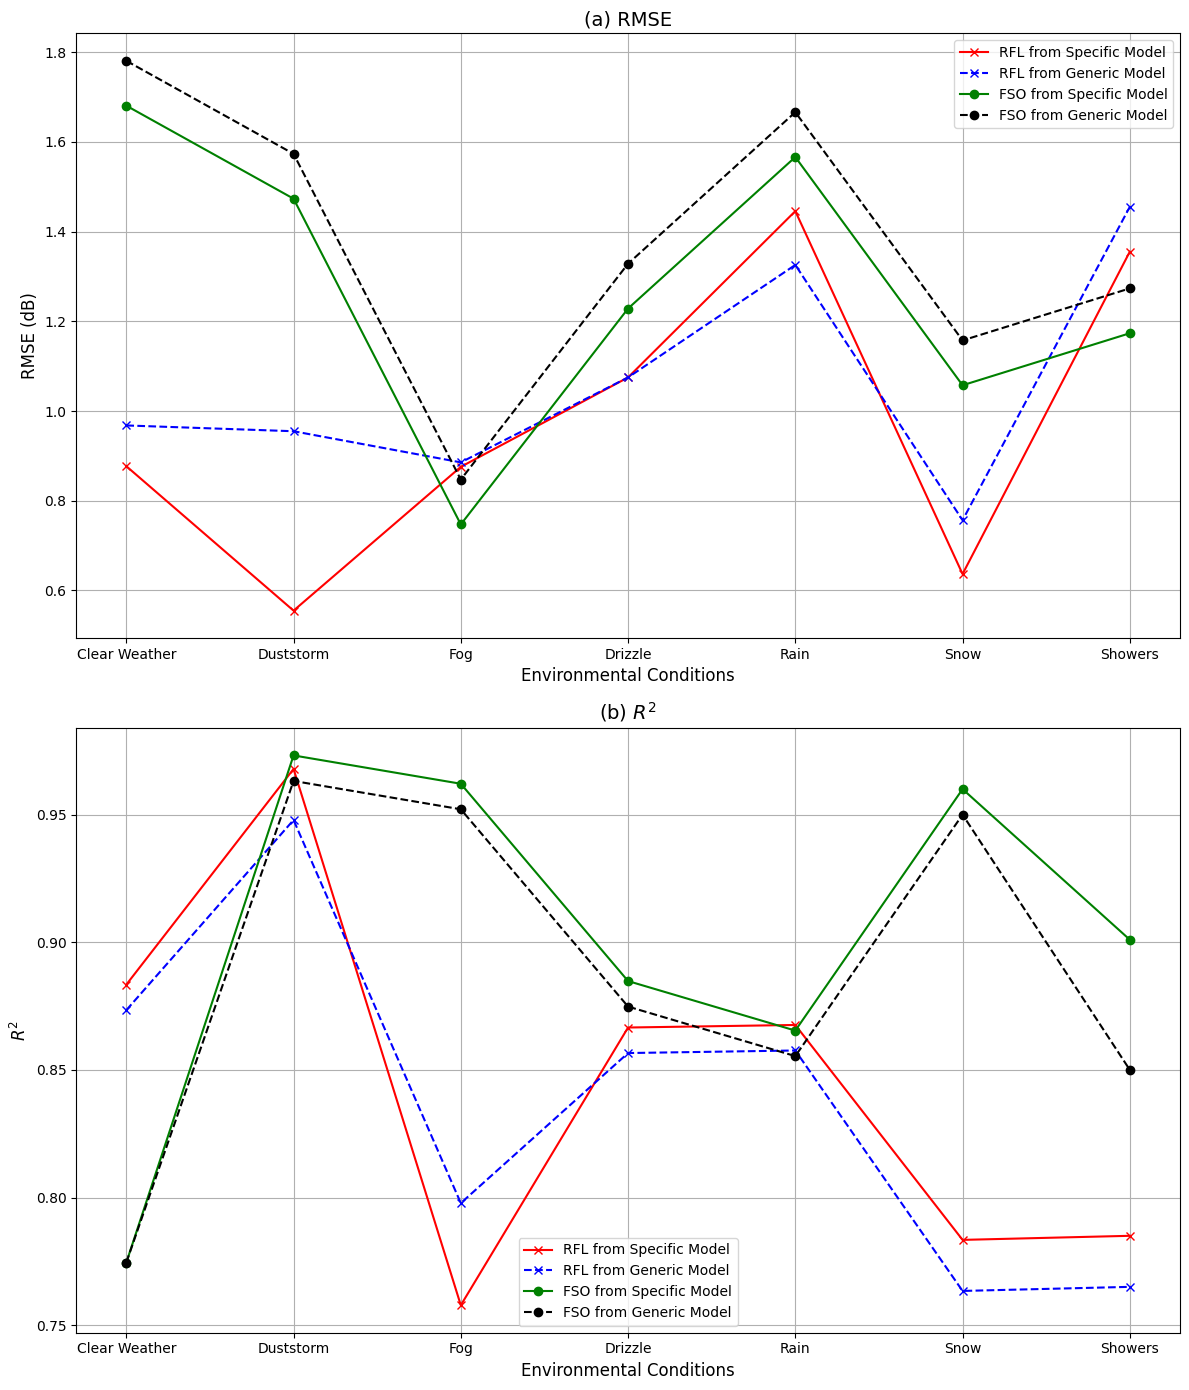

In [1]:
import matplotlib.pyplot as plt

# Data for the specific model
rmse_rfl_specific = [0.8771, 0.555, 0.8756, 1.075, 1.4458, 0.6366, 1.3554]
r2_rfl_specific = [0.8834, 0.9679, 0.7578, 0.8666, 0.8676, 0.7834, 0.785]
rmse_fso_specific = [1.6809, 1.4735, 0.7472, 1.2286, 1.5664, 1.0575, 1.1735]
r2_fso_specific = [0.7745, 0.9732, 0.9621, 0.8848, 0.8654, 0.96, 0.901]

# Data for the generic model
rmse_rfl_generic = [0.9679, 0.955, 0.8856, 1.075, 1.3258, 0.7566, 1.4554]
r2_rfl_generic = [0.8734, 0.9479, 0.7978, 0.8566, 0.8576, 0.7634, 0.765]
rmse_fso_generic = [1.7809, 1.5735, 0.8472, 1.3286, 1.6664, 1.1575, 1.2735]
r2_fso_generic = [0.7745, 0.9632, 0.9521, 0.8748, 0.8554, 0.95, 0.85]

# Setting up the labels for the SYNOP codes (environmental conditions)
conditions = [
    "Clear Weather", "Duststorm", "Fog", "Drizzle", "Rain", "Snow", "Showers"
]

# Plotting RMSE and R^2 values with generic models included
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

# (a) RMSE Plot
ax1.plot(conditions, rmse_rfl_specific, '-x', label='RFL from Specific Model', color='red')
ax1.plot(conditions, rmse_rfl_generic, '--x', label='RFL from Generic Model', color='blue')
ax1.plot(conditions, rmse_fso_specific, '-o', label='FSO from Specific Model', color='green')
ax1.plot(conditions, rmse_fso_generic, '--o', label='FSO from Generic Model', color='black')
ax1.set_title('(a) RMSE', fontsize=14)
ax1.set_xlabel('Environmental Conditions', fontsize=12)
ax1.set_ylabel('RMSE (dB)', fontsize=12)
ax1.legend()
ax1.grid(True)

# (b) R^2 Plot
ax2.plot(conditions, r2_rfl_specific, '-x', label='RFL from Specific Model', color='red')
ax2.plot(conditions, r2_rfl_generic, '--x', label='RFL from Generic Model', color='blue')
ax2.plot(conditions, r2_fso_specific, '-o', label='FSO from Specific Model', color='green')
ax2.plot(conditions, r2_fso_generic, '--o', label='FSO from Generic Model', color='black')
ax2.set_title(r'(b) $R^2$', fontsize=14)
ax2.set_xlabel('Environmental Conditions', fontsize=12)
ax2.set_ylabel(r'$R^2$', fontsize=12)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
